In [47]:
import os
import sys
import logging
import cv2
import json
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from ast import literal_eval
from tqdm import tqdm_notebook as tqdm
import numpy as np
import pickle


%matplotlib inline
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('TestClassifier')

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from vehicle_detector.object_detection import ObjectDetector
from vehicle_detector.descriptors import HOG
from vehicle_detector.utils import image_utils

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
def get_params_from_dataset_name(dataset_name):
    tokens = dataset_name.split('_')
    params = {
        'C': literal_eval(tokens[3]),
        'gamma': tokens[5] if tokens[5]=='auto' else literal_eval(tokens[5]),
        'color_hist': literal_eval(tokens[7]),
        'orientations': literal_eval(tokens[9]),
        'pixels_per_cell': literal_eval(tokens[11]),
        'cells_per_block': literal_eval(tokens[13]),
        'hog_color_space': os.path.splitext(tokens[15])[0]
    }
    return params

In [37]:
with open('../data/top_models.json', 'r') as fp:
    top_models = json.load(fp)

top_models.sort(key=lambda x: x['accuracy'], reverse=True)
model_details = top_models[6]
model_details

{'accuracy': 99.072,
 'file_path': '../data/models/A_99.375_C_10_gamma_auto_CH_True_O_9_P_(12, 12)_C_(4, 4)_CS_BGR2HSV.cpickle',
 'name': 'A_99.375_C_10_gamma_auto_CH_True_O_9_P_(12, 12)_C_(4, 4)_CS_BGR2HSV.cpickle',
 'scaler_file_path': '../data/models/A_99.375_C_10_gamma_auto_CH_True_O_9_P_(12, 12)_C_(4, 4)_CS_BGR2HSV_scaler.cpickle'}

In [38]:
clf = pickle.loads(open(model_details['file_path'] ,'rb').read())
scaler = pickle.loads(open(model_details['scaler_file_path'], 'rb').read())
params = get_params_from_dataset_name(model_details['name'])


In [39]:
hog_descriptor = HOG(params['orientations'], params['pixels_per_cell'], params['cells_per_block'])
object_detector = ObjectDetector(clf, scaler, hog_descriptor, params['color_hist'], 
                                 params['hog_color_space'], ystart=450, ystop=700)


In [40]:
test_image_names = list(filter(lambda x: x.endswith('.jpg')==True, os.listdir('../test_images')))
test_image_paths = list(map(lambda x: os.path.join('../test_images', x), test_image_names))
test_images = [cv2.imread(i) for i in test_image_paths]

In [45]:
idx = 3
bboxes, probs = object_detector.detect(test_images[idx])
print(bboxes, probs)

draw_img = image_utils.draw_boxes(test_images[idx], bboxes)
plt.imshow(draw_img)

[(1088, 450, 1152, 514), (1120, 450, 1184, 514), (1152, 450, 1216, 514), (1184, 450, 1248, 514), (1216, 450, 1280, 514)] [array([ 1.]), array([ 1.]), array([ 1.]), array([ 1.]), array([ 1.])]


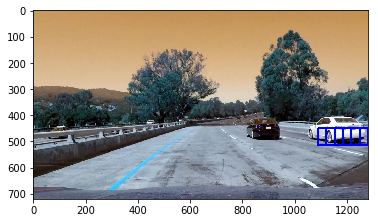